# <p style="color:#40173f;text-align:center;font-family:Segoe Script;font-weight: bold;font-size:170%">Customer Churn Prediction</p>

<img src="https://bluehenanalytics.com/wp-content/uploads/2021/02/Employee-walking-away.jpg" alt="Stay Home" width="550" height="200">

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; ">
    
<b>Customer Churn:</b> is the phenomenon where customers or subscribers stop using the products or services provided by a business. To reduce churn, companies employ strategies such as improving customer experience, personalized offers, and proactive customer support to retain existing customers and maintain a loyal customer base.

## <p style="color:#40173f;text-align:center;font-family:Segoe Script;font-weight: bold;font-size:170%">Table of Contents 📋</p>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; ">
    
📌 [1. Import Libraries](#1)
    
    
📌 [2. Data Preprocessing- I](#2)
    
    
📌 [3. Exploratory Data Analysis](#3) 
    
      
📌 [4. Data Preprocessing- II](#4)
    
    
📌 [5. Machine Learning](#5)
    
 
📌 [6. Conclusion](#6)   

<a id="1"></a>
## <p style="color:#125E12;font-family:Segoe Script;font-weight: bold;">1. Import Libraries 📚</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
df= pd.read_csv("C:/Users/Maryam/Downloads/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a id="2"></a>
## <p style="color:#125E12;font-family:Segoe Script;font-weight: bold;">2. Data Preprocessing- I</p>

In [4]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 10000 rows and 14 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## <p style='font-family:Corbel ; font-size:22px'> Check Missing Values</p>

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)
df.shape

(10000, 11)

In [9]:
df.rename(columns=({'Exited':'Churn'}),inplace=True)

In [10]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


## <p style='font-family:Corbel ; font-size:22px'> Statistical Overview </p>

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

In [13]:
df.groupby(['Gender', 'Churn']).first()

CreditScore Geography  Age  Tenure    Balance  NumOfProducts  \
Gender Churn                                                                 
Female 0              608     Spain   41       1   83807.86              1   
       1              619    France   42       2       0.00              1   
Male   0              822    France   50       7       0.00              2   
       1              645     Spain   44       8  113755.78              2   

              HasCrCard  IsActiveMember  EstimatedSalary  
Gender Churn                                              
Female 0              0               1        112542.58  
       1              1               1        101348.88  
Male   0              1               1         10062.80  
       1              1               0        149756.71

In [14]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
df["Geography"].describe(include=['object', 'bool'])

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [16]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<a id="3"></a>
## <p style="color:#125E12;font-family:Segoe Script;font-weight: bold;">3. Exploratory Data Analysis 📊</p>

## <p style='font-family:Corbel ; font-size:22px'> Churn Distribution </p>

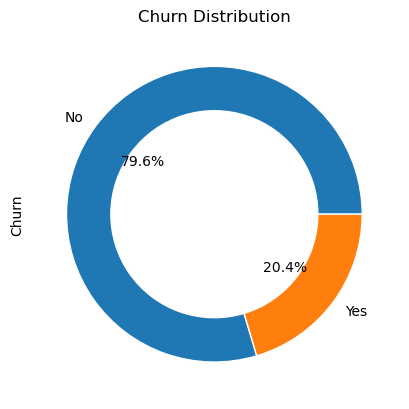

In [17]:
label_mapping = {0: 'No', 1: 'Yes'}
df["Churn"].map(label_mapping).value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Churn Distribution')
plt.show()

## <p style='font-family:Corbel ; font-size:22px'> Churn Trend based on Gender </p>

In [18]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

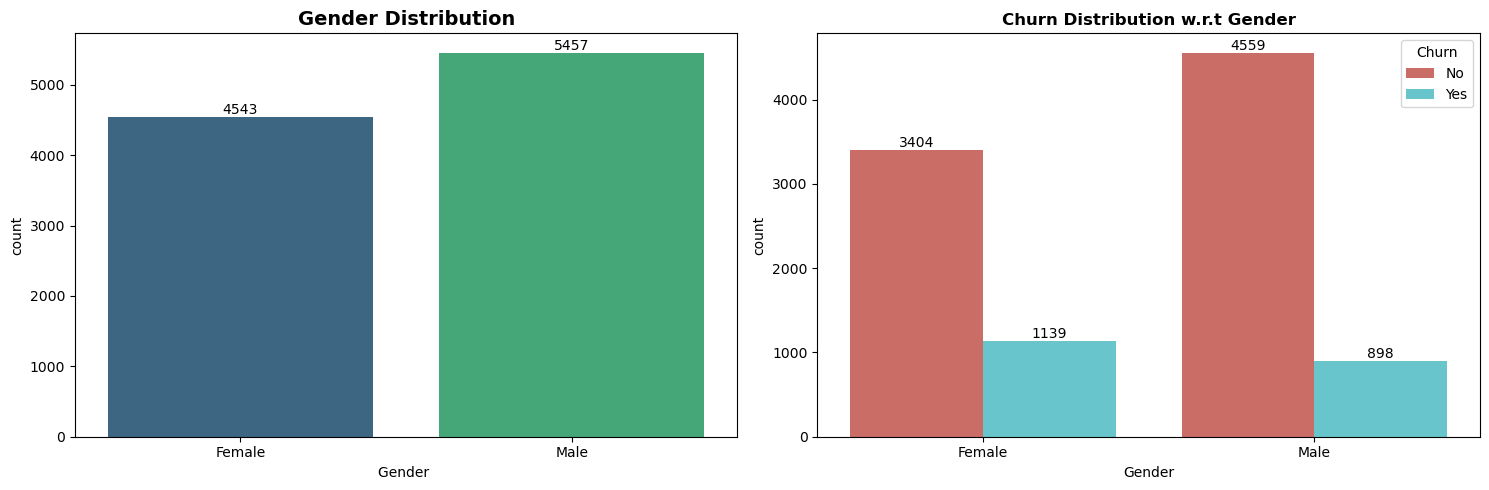

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=df['Gender'], ax=axes[0], palette='viridis')
for bars in axes[0].containers:
    axes[0].bar_label(bars)
axes[0].set_xlabel('Gender ', fontsize=10)
axes[0].set_title('Gender Distribution', weight='bold', fontsize=14)
sns.countplot(x='Gender', hue='Churn', data=df, palette='hls', ax=axes[1])
for bars in axes[1].containers:
    axes[1].bar_label(bars)
axes[1].set_title('Churn Distribution w.r.t Gender', weight='bold', fontsize=12)
axes[1].set_xlabel('Gender', fontsize=10)
axes[1].legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

<a id="5.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>The majority of customers are male, but females exhibit a higher likelihood of churning. This indicates a potential area for targeted retention efforts among female customers. </b></span>

## <p style='font-family:Corbel ; font-size:22px'> Churn Trend based on Location </p>

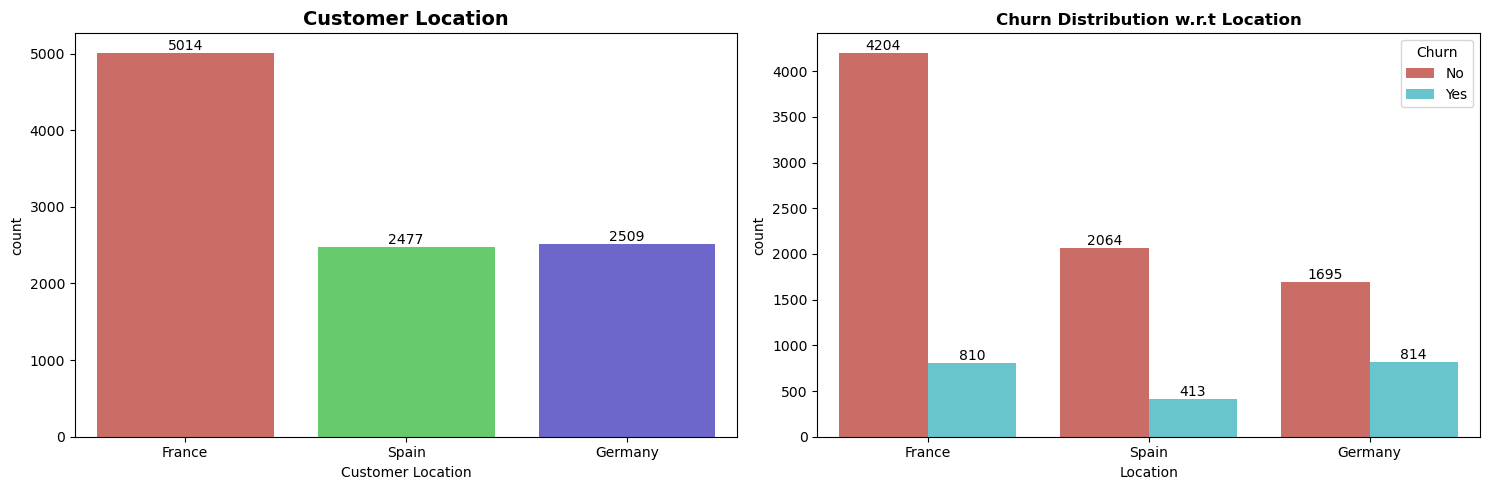

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=df['Geography'], ax=axes[0], palette='hls')
for bars in axes[0].containers:
    axes[0].bar_label(bars)

axes[0].set_xlabel('Customer Location', fontsize=10)
axes[0].set_title('Customer Location', weight='bold', fontsize=14)

sns.countplot(x='Geography', hue='Churn', data=df, palette='hls', ax=axes[1])
for bars in axes[1].containers:
    axes[1].bar_label(bars)
axes[1].set_title('Churn Distribution w.r.t Location', weight='bold', fontsize=12)
axes[1].set_xlabel('Location', fontsize=10)
axes[1].legend(title='Churn', labels=['No', 'Yes'])


# Adjust layout
plt.tight_layout()

plt.show()

<a id="5.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>While most customers are from France, customers from Germany demonstrate a higher risk to churn. </b></span>

## <p style='font-family:Corbel ; font-size:22px'> Churn Trend based on Customer's Age </p>

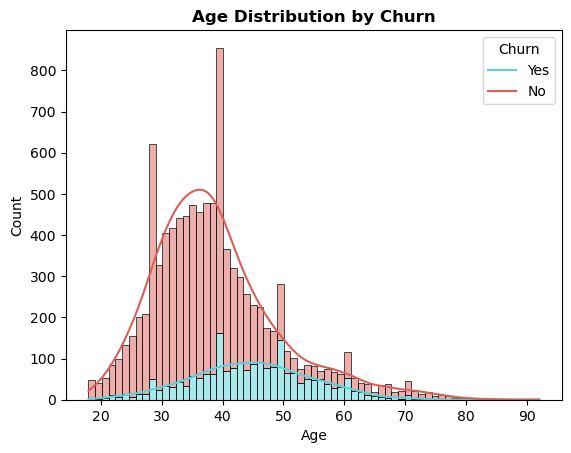

In [21]:
sns.histplot(data=df, x='Age', hue='Churn', multiple='stack', kde=True, palette='hls')
plt.title('Age Distribution by Churn', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Yes', 'No'])
plt.show()

<a id="5.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Churn rates are notably higher among customers in the age range of 40 to 50. This age group demands special attention for customer engagement and retention initiatives.</b></span>

## <p style='font-family:Corbel ; font-size:22px'> Churn Trend: Active vs. Non-Active Members </p>

In [22]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

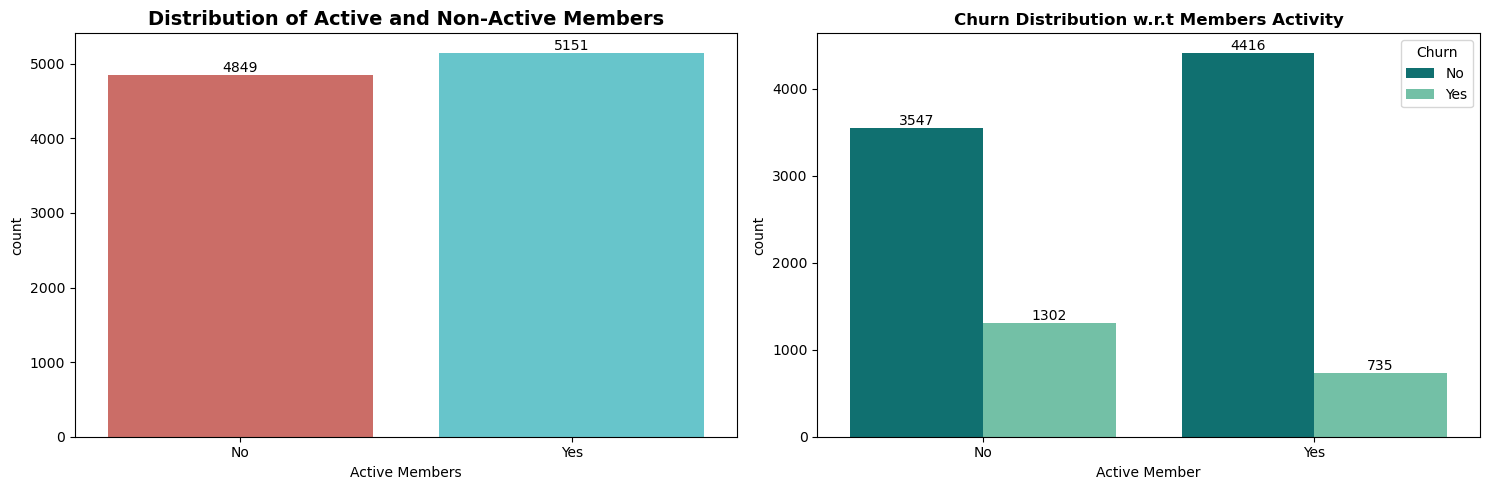

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=df['IsActiveMember'], ax=axes[0], palette='hls')
for bars in axes[0].containers:
    axes[0].bar_label(bars)
axes[0].set_xticks(ticks=[0, 1])
axes[0].set_xticklabels(['No', 'Yes'])
axes[1].set_xlabel('Active Members', fontsize=10)
axes[0].set_xlabel('Active Members', fontsize=10)
axes[0].set_title('Distribution of Active and Non-Active Members', weight='bold', fontsize=14)

colors = ['#008080', '#66cdaa']
sns.countplot(x='IsActiveMember', hue='Churn', data=df, palette=colors, ax=axes[1])
for bars in axes[1].containers:
    axes[1].bar_label(bars)
axes[1].set_title('Churn Distribution w.r.t Members Activity', weight='bold', fontsize=12)
axes[1].set_xlabel('Active Member', fontsize=10)
axes[1].legend(title='Churn', labels=['No', 'Yes'])
axes[1].set_xticks(ticks=[0, 1])
axes[1].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()

plt.show()

<a id="5.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Customers who are non-active members exhibit a higher churn rate. This emphasizes the importance of fostering customer engagement and providing value-added services to enhance retention.</b></span>

## <p style='font-family:Corbel; font-size:22px'> Churn Trend: Members with and without Credit Card </p>

In [24]:
credit_card= df['HasCrCard'].value_counts()
credit_card

1    7055
0    2945
Name: HasCrCard, dtype: int64

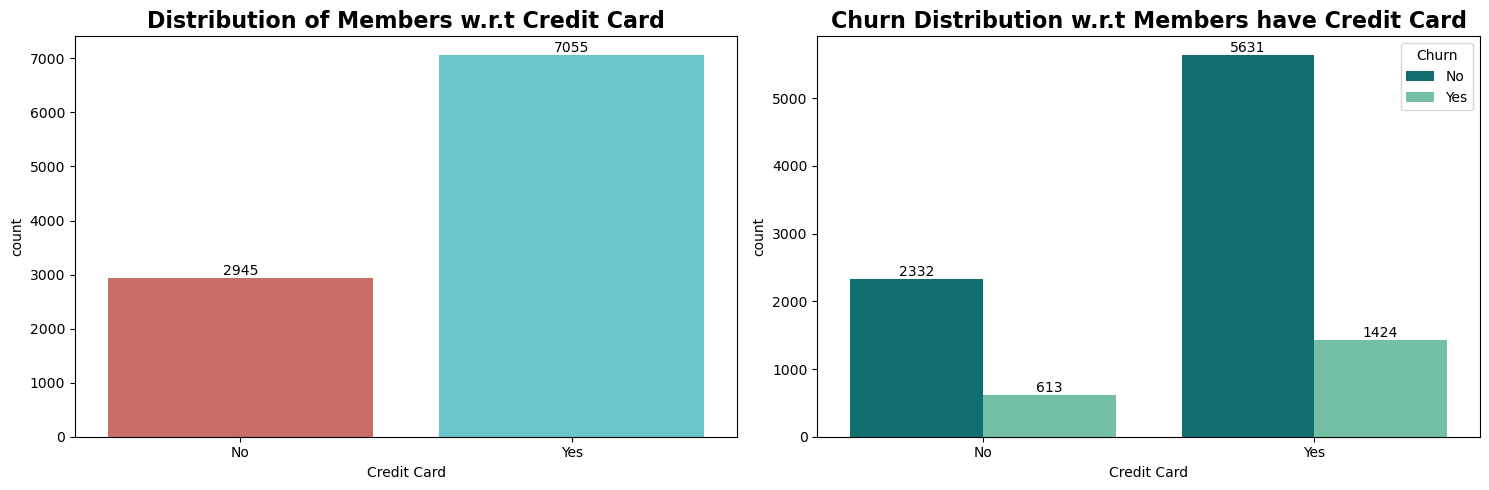

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=df['HasCrCard'], ax=axes[0], palette='hls')
for bars in axes[0].containers:
    axes[0].bar_label(bars)
axes[0].set_xticks(ticks=[0, 1])
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].set_xlabel('Credit Card', fontsize=10)
axes[0].set_title('Distribution of Members w.r.t Credit Card', weight='bold', fontsize=16)

colors = ['#008080', '#66cdaa']
sns.countplot(x='HasCrCard', hue='Churn', data=df, palette=colors, ax=axes[1])
for bars in axes[1].containers:
    axes[1].bar_label(bars)
axes[1].set_title('Churn Distribution w.r.t Members have Credit Card', weight='bold', fontsize=16)
axes[1].set_xlabel('Credit Card', fontsize=10)
axes[1].legend(title='Churn', labels=['No', 'Yes'])
axes[1].set_xticks(ticks=[0, 1])
axes[1].set_xticklabels(['No', 'Yes'])

# Adjust layout
plt.tight_layout()

plt.show()

<a id="5.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Majority of the customers have Credit card while Number of customers leaving have a credit card. </b></span>

## <p style='font-family:Corbel; font-size:22px'> Churn Trend based Tenure </p>

In [26]:
tenure=df.Tenure.value_counts(ascending=False)
tenure

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

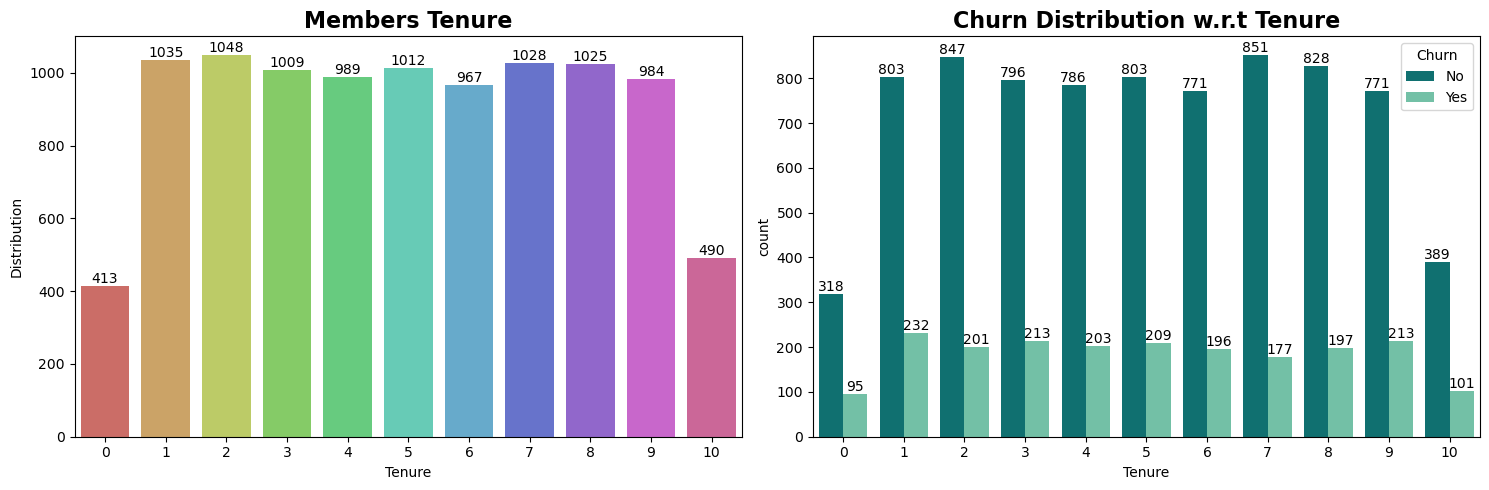

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=tenure.index, y=tenure.values, ax=axes[0], palette='hls')
for bars in axes[0].containers:
    axes[0].bar_label(bars)
axes[0].set_xlabel('Tenure', fontsize=10)
axes[0].set_ylabel('Distribution', fontsize=10)

axes[0].set_title('Members Tenure', weight='bold', fontsize=16)

colors = ['#008080', '#66cdaa']
sns.countplot(x='Tenure', hue='Churn', data=df, palette=colors, ax=axes[1])
for bars in axes[1].containers:
    axes[1].bar_label(bars)
axes[1].set_title('Churn Distribution w.r.t Tenure', weight='bold', fontsize=16)
axes[1].set_xlabel('Tenure', fontsize=10)
axes[1].legend(title='Churn', labels=['No', 'Yes'])

# Adjust layout
plt.tight_layout()

plt.show()

<a id="5.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Churn counts are notably higher among customers with a tenure of 1-9. This suggests that customers in their early tenure stages may require special attention to improve their retention.</b></span>

## <p style='font-family:Corbel; font-size:22px'> Churn Trend based on Customer's Balance </p>

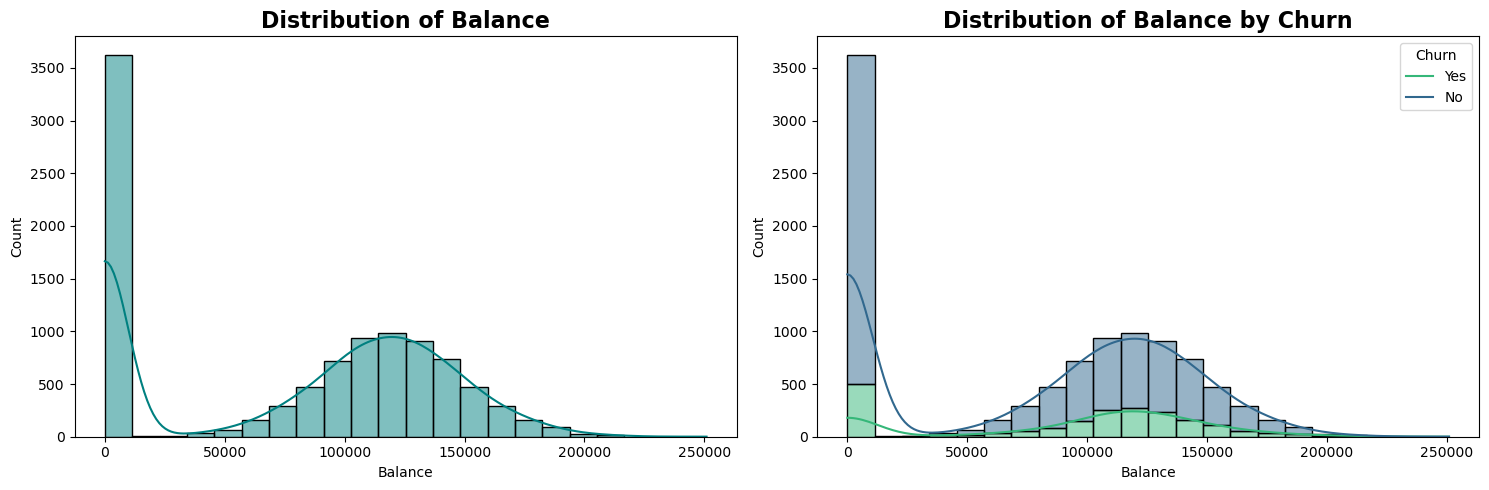

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(x=df['Balance'], kde=True, ax=ax[0],color='teal')
ax[0].set_title('Distribution of Balance', weight='bold', fontsize=16)

sns.histplot(x=df['Balance'], hue=df['Churn'], multiple='stack',kde=True , ax=ax[1], palette='viridis')
ax[1].set_title('Distribution of Balance by Churn', weight='bold', fontsize=16)
ax[1].legend(title='Churn', labels=['Yes', 'No'])

plt.tight_layout()
plt.show()

<a id="5.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Majority of customers have zero balance, although customers with zero balance and customers having balance between 100000 to 150000 are more likely to churn </b></span>

## <p style='font-family:Corbel; font-size:22px'> Churn Trend based on Customer's Credit Score </p>

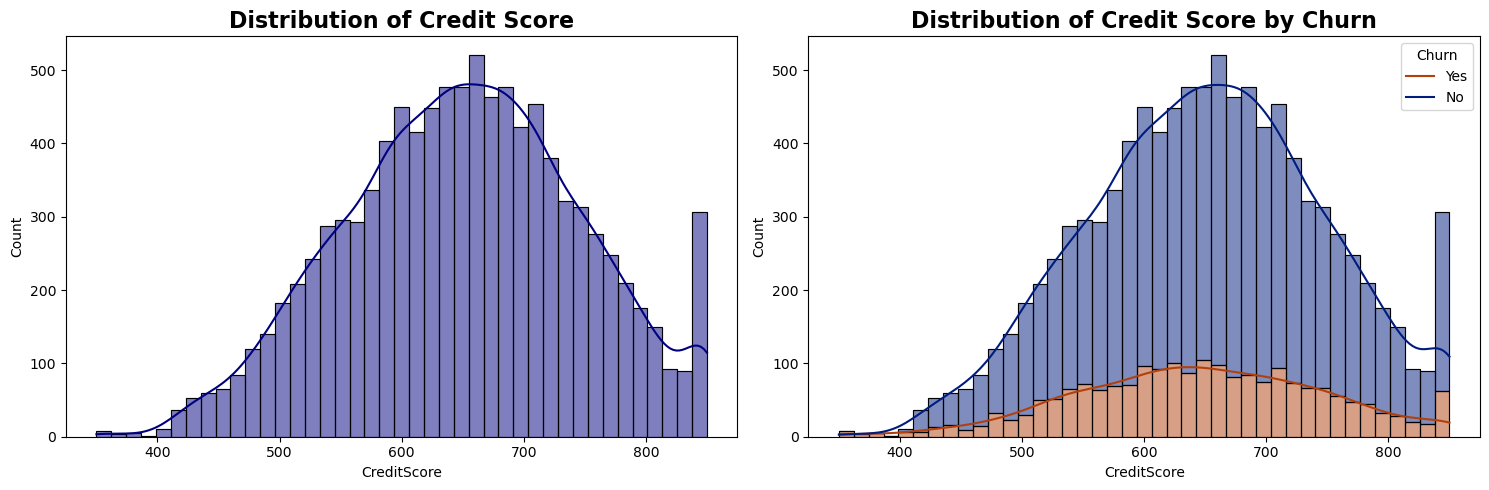

In [29]:

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(x=df['CreditScore'], kde=True, ax=ax[0],color='navy')
ax[0].set_title('Distribution of Credit Score', weight='bold', fontsize=16)

sns.histplot(x=df['CreditScore'], hue=df['Churn'], multiple='stack',kde=True , ax=ax[1], palette='dark')
ax[1].set_title('Distribution of Credit Score by Churn', weight='bold', fontsize=16)
ax[1].legend(title='Churn', labels=['Yes', 'No'])

plt.tight_layout()
plt.show()

<a id="5.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Credit score is not good factor to describe the churn rate </b></span>

## <p style='font-family:Corbel; font-size:22px'> Churn Trend based on Customer's Salary </p>

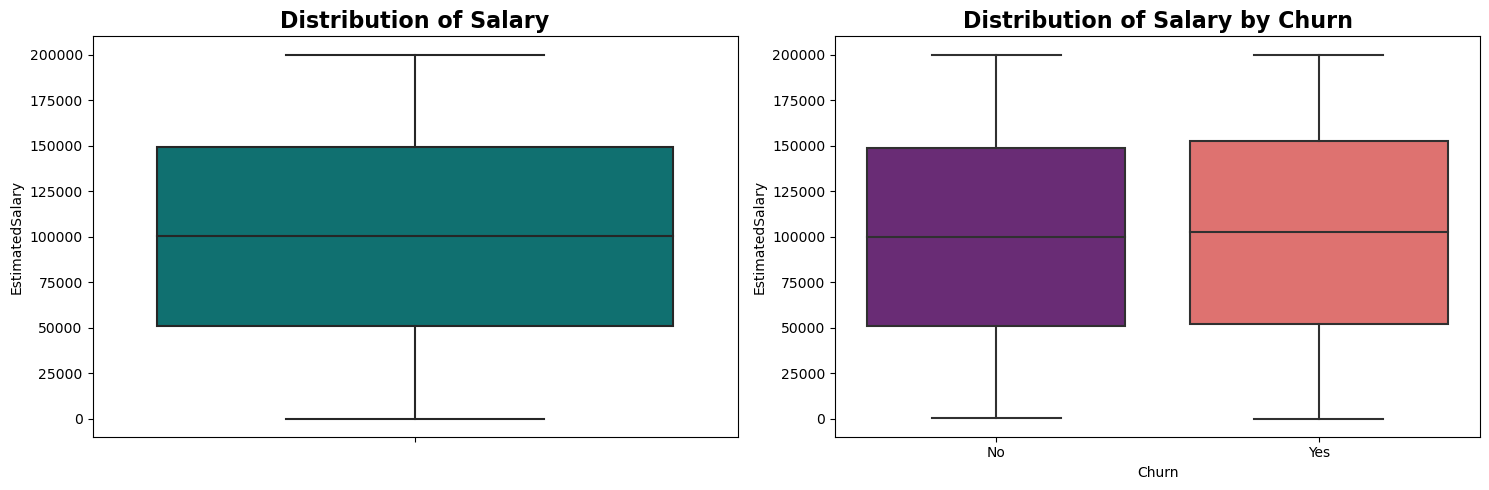

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(y=df['EstimatedSalary'], ax=ax[0],color='teal')
ax[0].set_title('Distribution of Salary', weight='bold', fontsize=16)

sns.boxplot(x=df['Churn'],y=df['EstimatedSalary'], ax=ax[1], palette='magma')
ax[1].set_title('Distribution of Salary by Churn', weight='bold', fontsize=16)
ax[1].set_xticks(ticks=[0, 1])
ax[1].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

<a id="5.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>While there is no definite pattern in salary distribution of customers. So, Estimated Salary is not good indicator for churn prediction. </b></span>

## <p style='font-family:Corbel; font-size:22px'> Churn Trend based on No. Products Purchased by Customers </p>

In [31]:
products=df.NumOfProducts.value_counts()
products

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

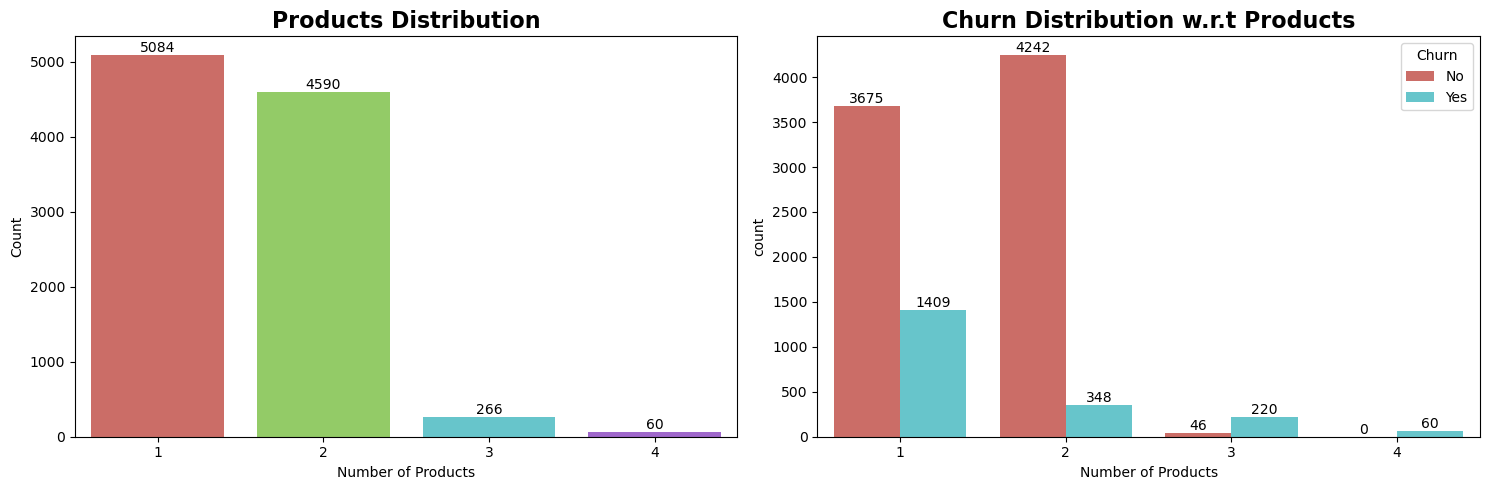

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=products.index, y=products.values, ax=axes[0], palette='hls')
for bars in axes[0].containers:
    axes[0].bar_label(bars)
axes[0].set_xlabel('Number of Products', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)

axes[0].set_title('Products Distribution', weight='bold', fontsize=16)

sns.countplot(x='NumOfProducts', hue='Churn', data=df, palette='hls', ax=axes[1])
for bars in axes[1].containers:
    axes[1].bar_label(bars)
axes[1].set_title('Churn Distribution w.r.t Products', weight='bold', fontsize=16)
axes[1].set_xlabel('Number of Products', fontsize=10)
axes[1].legend(title='Churn', labels=['No', 'Yes'])

# Adjust layout
plt.tight_layout()

plt.show()

<a id="5.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>The majority of customers purchased 1 or 2 Products, Churn rate is higher among customers who purchased 1 and more products. </b></span>

<a id="4"></a>
## <p style="color:#125E12;font-family:Segoe Script;font-weight: bold;">4. Data Preprocessing- II</p>

## <p style='font-family:Corbel; font-size:22px'> Label Encoding </p>

In [28]:
#Loop over each column where datatype is 'object':
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [29]:
for col in df.select_dtypes(include=['object']).columns:
    label_encoder= LabelEncoder()
    #fit encoder to object datatype values:
    label_encoder.fit(df[col].unique())
    
    #transform column with encoder
    df[col] = label_encoder.transform(df[col])
    
    #print column name with encoded values
    print(f"{col}: {df[col].unique()}")

Geography: [0 2 1]
Gender: [0 1]


## <p style='font-family:Corbel; font-size:22px'> Corelation Heatmap </p>

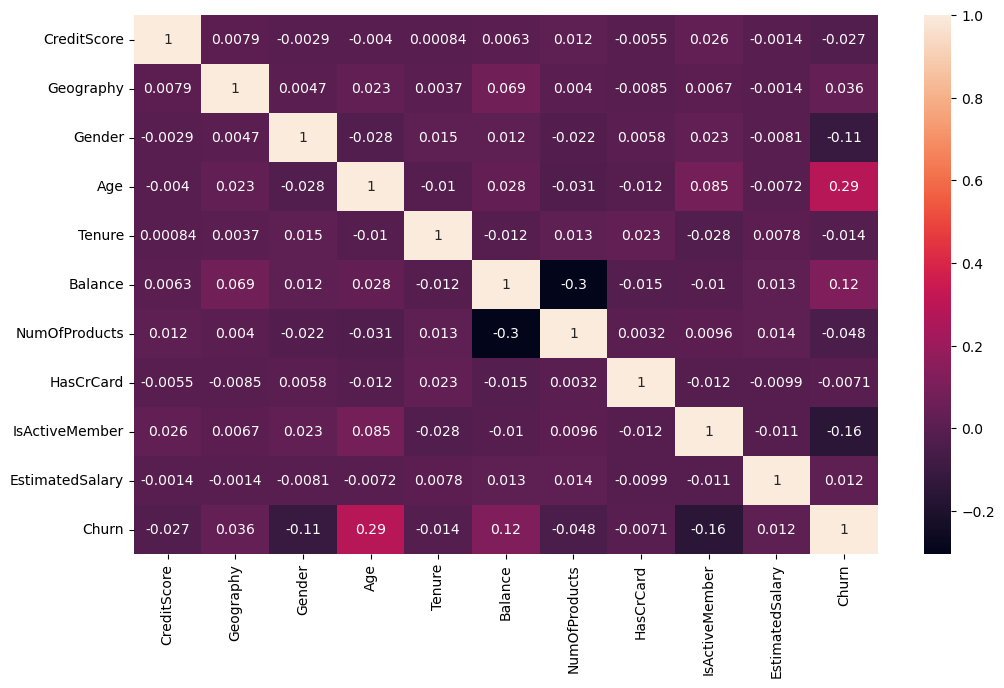

In [30]:
#Correlation Heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), fmt='.2g', annot=True);

## <p style='font-family:Corbel; font-size:22px'> Get Input and Target Columns </p>

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

In [32]:
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57


## <p style='font-family:Corbel; font-size:22px'> Splitting data for training and testing </p>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

<a id="5"></a>
## <p style="color:#125E12;font-family:Segoe Script;font-weight: bold;">5. Machine Learning</p>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; ">
    
To predict churn, I'm employing the following models:
- Random Forest Classifier
- Logistic Regression

## <p style='font-family:Corbel; font-size:22px'>Random Forest Classifier </p>

In [34]:
rfc = RandomForestClassifier(random_state=2, max_depth=6)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=2)

In [36]:
rfc_pred = rfc.predict(X_test)
rfc_score= accuracy_score(y_test, rfc_pred)*100
print("Test Accuracy: ",rfc_score,'%')

Test Accuracy:  85.95 %


In [37]:
rfc_pred = rfc.predict(X_test)
print("Acuracy Score: ",rfc_score)
print("F-1 Score: ", f1_score(y_test, rfc_pred))
print("Precision Score: ",(precision_score(y_test, rfc_pred)))

Acuracy Score:  85.95
F-1 Score:  0.48440366972477067
Precision Score:  0.8148148148148148


In [38]:
print("Training Accuracy:", rfc.score(X_train,y_train)*100,'%')

Training Accuracy: 86.325 %


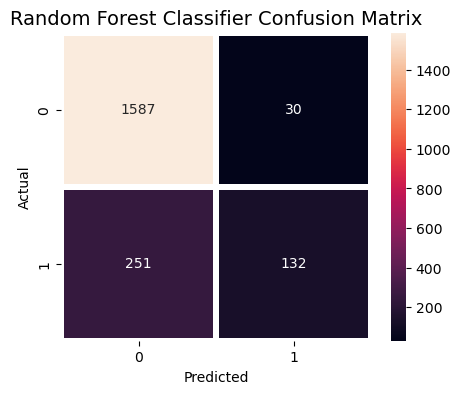

In [43]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, rfc_pred),fmt = "d",annot=True,linewidths=3)
    
plt.title("Random Forest Classifier Confusion Matrix",fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

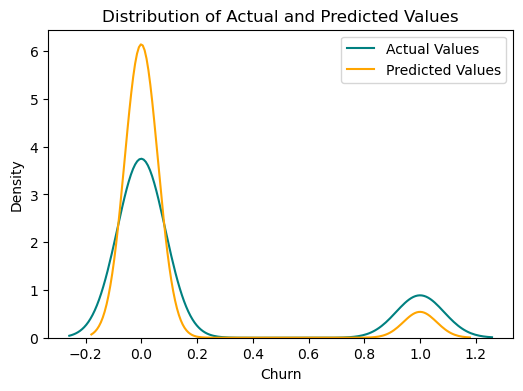

In [44]:
plt.figure(figsize=(6, 4))

# Create the first KDE plot
ax = sns.kdeplot(y_test, color='teal', label='Actual Values', shade=False)

# Overlay the second KDE plot on the same axis
sns.kdeplot(rfc_pred, color='orange', label='Predicted Values', shade=False, ax=ax)

plt.title("Distribution of Actual and Predicted Values")
plt.legend()
plt.show()

<div style="background-color:white;font-size:15px;font-family:Verdana;border-style: solid;border-color: #40173f;border-width:3px;padding:10px;margin: 1px;color:#40173f;overflow:hidden"> <b>Evaluate: Random Forest Classifier</b><br>
Training Accuracy - 86.32% <br>
Test Accuracy - 85.95%</div>

## <p style='font-family:Corbel; font-size:22px'>Logistic Regression</p>

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2)
lr.fit(X_train, y_train)

LogisticRegression(random_state=2)

In [42]:
lr_pred = lr.predict(X_test)
lr_score = accuracy_score(y_test, lr_pred)
lr_score

0.7995

In [43]:
print(precision_score(y_test, lr_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

0.3125
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1617
           1       0.31      0.04      0.07       383

    accuracy                           0.80      2000
   macro avg       0.56      0.51      0.48      2000
weighted avg       0.72      0.80      0.73      2000



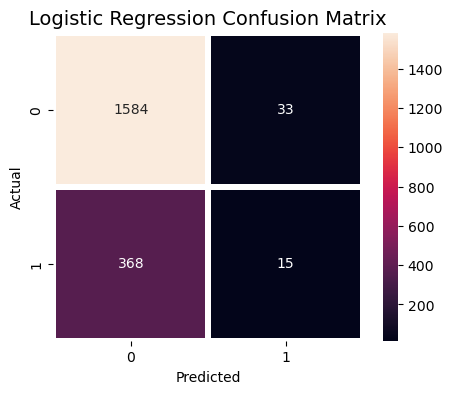

In [48]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, lr_pred),fmt = "d",annot=True,linewidths=3)
    
plt.title("Logistic Regression Confusion Matrix",fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

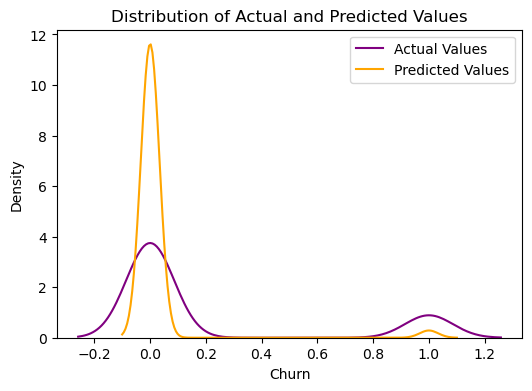

In [49]:
plt.figure(figsize=(6, 4))

# Create the first KDE plot
ax = sns.kdeplot(y_test, color='purple', label='Actual Values', shade=False)

# Overlay the second KDE plot on the same axis
sns.kdeplot(lr_pred, color='orange', label='Predicted Values', shade=False, ax=ax)

plt.title("Distribution of Actual and Predicted Values")
plt.legend()
plt.show()

<div style="background-color:white;font-size:15px;font-family:Verdana;border-style: solid;border-color: #40173f;border-width:3px;padding:10px;margin: 1px;color:#40173f;overflow:hidden"> <b>Evaluate: Logistic Regression</b><br>
Training Accuracy - 79.7% <br>
Test Accuracy - 80.5%</div>

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [45]:
gbc_pred = gbc.predict(X_test)


In [46]:
print(accuracy_score(y_test, gbc_pred))
print(precision_score(y_test, gbc_pred))
print(classification_report(y_test, gbc_pred))

0.862
0.7661691542288557
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1617
           1       0.77      0.40      0.53       383

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



<Axes: >

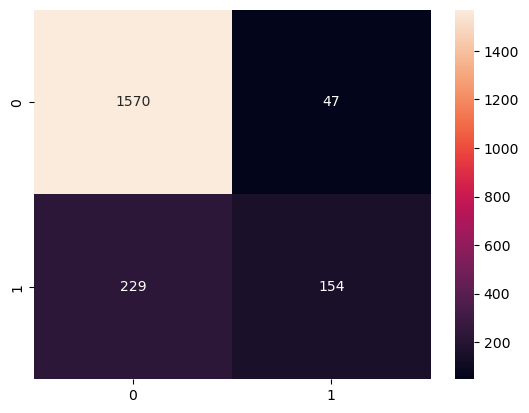

In [49]:
sns.heatmap(confusion_matrix(y_test, gbc_pred), annot=True, fmt='d')

In [53]:
y_test.value_counts()

0    1617
1     383
Name: Churn, dtype: int64

## <p style='font-family:Corbel; font-size:22px'>ML Model Selection</p>

In [50]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression ', 'Random Forest Classifier', ],
    'Accuracy Score': [lr_score, rfc_score ]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
Model_Comparison_df.reset_index()

,Model,Accuracy Score
0,Random Forest Classifier,85.95
1,Logistic Regression,79.95


<div style="background-color:white;font-size:15px;font-family:Verdana;border-style: solid;border-color: #40173f;border-width:3px;padding:10px;margin: 1px;color:#40173f;overflow:hidden"> <b>Best Model: Random Forest Classifier:</b><br>
Training Accuracy - 86.32% <br>
Test Accuracy - 85.95% <br>
</div>

<a id="6"></a>
## <p style="color:#125E12;font-family:Segoe Script;font-weight: bold;">6. Wrap-Up</p>

 <div class="alert alert-block alert-info" style="font-size:16px; font-family:verdana; ">
    
ML model-building efforts revealed the following:
- Among the machine learning models evaluated, the <b>Random Forest </b> algorithm demonstrated superior performance compared to <b>Logistic Regression</b>. The Random Forest model achieved higher accuracy in both training and test datasets, suggesting that it is better at capturing complex relationships within the churn data